# Regressão Linear com NumPy

## Objetivos deste experimento

Este exemplo utiliza regressão linear para estimar o comprimento das sépalas da íris a partir do seu comprimento das pétalas.
Utiliza-se programação totalmente NumPy com:
- o **cálculo do gradiente**,
- a **função de perda** e
- a atualização dos parâmetros são feitos de forma explícita.
- A rede é criada com uma camada como uma classe

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLinear_Otimizacao.png)

## Importação dos pacotes

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt   # para plotting

from sklearn.datasets import load_iris  # para carregar dataset

import numpy as np  # processamento matricial

np.random.seed(1234)

## Dataset

### Leitura dos dados

In [ ]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_train = data[:,0:1]
y_train = data[:,1:2]

n_samples = x_train.shape[0]
print('x_train.shape:',x_train.shape, x_train.dtype)
print('y_train.shape:',y_train.shape, y_train.dtype)

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: (50, 1) float64
y_train.shape: (50, 1) float64
x_train[:5]:
 [[7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]]
y_train[:5]:
 [[4.7]
 [4.5]
 [4.9]
 [4. ]
 [4.6]]


### Normalização dos dados

In [ ]:
x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()

Text(0, 0.5, 'Comprimento petalas')

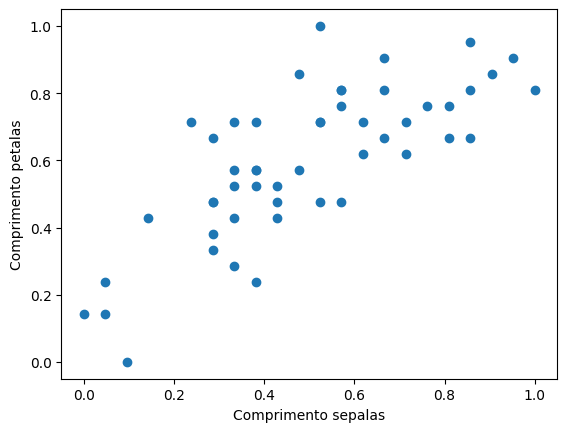

In [ ]:
plt.scatter(x_train,y_train)
plt.xlabel('Comprimento sepalas')
plt.ylabel('Comprimento petalas')

## Modelo da rede

### Reta de ajuste

A equação da reta no plano necessita de dois parâmetros, aqui denominados $w_0$ (*bias*) e inclinação $w_1$. Veja figura:

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/linhareta.png)

A reta de ajuste será dada por:

$$ \hat{y} = w_0 + w_1 x $$

onde
* $w_1$ é o coeficiente angular da reta e
* $w_0$ é a interseção do eixo vertical quando x é igual a zero, também denominado de *bias*.
* $x$ é a variável de entrada (comprimento das sépalas) e
* $\hat{y}$ é a predição (comprimento estimado das pétalas).

### Linear Regression Model

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLinearNeuronio.png)

### Formulação matricial do neurônio

* $\mathbf{w} = [w_0 \ w_1]$ é vetor linha de parâmetros e
* $\mathbf{x} = [1 \ x_0] $ é vetor linha de uma amostra (com *bias*).

$$ \hat{y} = 1 w_0 + x_0 w_1 $$

$$ [\hat{y}] = [1 \ x_0] \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} $$

$$ \mathbf{\hat{y}} = \mathbf{x} \mathbf{w^T} $$

### Fazendo o predict de várias amostras

$$ \begin{matrix}
\begin{bmatrix}
\hat{y}_0\\
\hat{y}_1\\
\\
\hat{y}_{M-1}
\end{bmatrix} &=& \begin{bmatrix}
1 & x_0 \\
1 & x_1\\
\\
1 & x_{M-1} \\
\end{bmatrix}
&
\begin{bmatrix}
w_0\\
w_1
\end{bmatrix} \\
(M,1) & & (M,2) & (2,1) \\
\end{matrix} $$

### Preenchendo x com coluna de 1's para bias

In [ ]:
x_train_bias = np.hstack([np.ones(shape=(n_samples,1)), x_train])

In [ ]:
x_train_bias

array([[1.        , 1.        ],
       [1.        , 0.71428571],
       [1.        , 0.95238095],
       [1.        , 0.28571429],
       [1.        , 0.76190476],
       [1.        , 0.38095238],
       [1.        , 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.80952381],
       [1.        , 0.14285714],
       [1.        , 0.04761905],
       [1.        , 0.47619048],
       [1.        , 0.52380952],
       [1.        , 0.57142857],
       [1.        , 0.33333333],
       [1.        , 0.85714286],
       [1.        , 0.33333333],
       [1.        , 0.42857143],
       [1.        , 0.61904762],
       [1.        , 0.33333333],
       [1.        , 0.47619048],
       [1.        , 0.57142857],
       [1.        , 0.66666667],
       [1.        , 0.57142857],
       [1.        , 0.71428571],
       [1.        , 0.80952381],
       [1.        , 0.9047619 ],
       [1.        , 0.85714286],
       [1.        , 0.52380952],
       [1.        , 0.38095238],
       [1.

### Classe com o modelo da rede

In [ ]:
class Net():
    def __init__(self, n_in, n_out):
        self.w = np.random.uniform(-0.1,0.1,(n_out,n_in)) #inicialização dos parâmetros

    def forward(self, x_bias):
        return x_bias.dot(self.w.T)

### Criando a rede, instanciando o objeto model

In [ ]:
model = Net(2,1) # duas entradas (1 + x0) e uma saída y_pred

In [ ]:
model.w

array([[-0.06169611,  0.02442175]])

### Testando o predict da rede (mesmo sem treiná-la)

In [ ]:
np.random.randn(4,2)

array([[ 1.43270697, -0.3126519 ],
       [-0.72058873,  0.88716294],
       [ 0.85958841, -0.6365235 ],
       [ 0.01569637, -2.24268495]])

In [ ]:
xin = np.random.randn(4,2) # 4 amostras, 2 entradas (1 + x0)
ypred = model.forward(xin)
ypred

array([[-0.04672767],
       [-0.10817898],
       [ 0.02066301],
       [-0.01795477]])

In [ ]:
ypred = model.forward(x_train_bias)
ypred

array([[-0.03727436],
       [-0.044252  ],
       [-0.0384373 ],
       [-0.05471847],
       [-0.04308906],
       [-0.05239258],
       [-0.04541494],
       [-0.06169611],
       [-0.04192612],
       [-0.05820729],
       [-0.06053317],
       [-0.0500667 ],
       [-0.04890376],
       [-0.04774082],
       [-0.05355553],
       [-0.04076318],
       [-0.05355553],
       [-0.05122964],
       [-0.04657788],
       [-0.05355553],
       [-0.0500667 ],
       [-0.04774082],
       [-0.04541494],
       [-0.04774082],
       [-0.044252  ],
       [-0.04192612],
       [-0.03960024],
       [-0.04076318],
       [-0.04890376],
       [-0.05239258],
       [-0.05471847],
       [-0.05471847],
       [-0.05122964],
       [-0.04890376],
       [-0.05588141],
       [-0.04890376],
       [-0.04076318],
       [-0.04541494],
       [-0.05355553],
       [-0.05471847],
       [-0.05471847],
       [-0.04774082],
       [-0.05122964],
       [-0.06053317],
       [-0.05355553],
       [-0

## Treinamento via gradiente descendente

Função de perda:
$$ J(\hat{y_i},y_i) = \frac{1}{M} \sum_{i=0}^{M-1} (\hat{y_i} - y_i)^2 $$

Gradiente:
$$  \mathbf{\nabla{J_w}} = \frac{2}{M}\mathbf{x^T}(\mathbf{x w^T} - \mathbf{y}) $$

Atualização dos parâmetros pelo gradiente descendente:
$$ \mathbf{w} = \mathbf{w} − \eta (\mathbf{\nabla J_w})^T $$

### Laço de treinamento

In [ ]:
num_epochs = 100
learning_rate = 0.5
losses = []
model = Net(2, 1)  # Treinamento com um novo modelo

for epoch in range(num_epochs):
    # Forward - predict
    y_pred = model.forward(x_train_bias)

    # Cálculo da função de perda (MSE) e armazenamento da perda
    loss = np.square(y_pred - y_train).mean()
    losses.append(loss)

    # Cálculo do gradiente pelas derivadas parciais
    w_grad = (2.0 / n_samples) * (x_train_bias.T).dot(x_train_bias.dot(model.w.T) - y_train)

    # Atualização dos pesos usando gradiente descendente
    model.w = model.w - learning_rate * w_grad.T

    # Exibir a perda a cada 10 épocas
    if (epoch + 1) % 10 == 0:
        print(f'Epoch[{epoch+1}/{num_epochs}], loss: {loss:.6f}')

Epoch[10/100], loss: 0.025289
Epoch[20/100], loss: 0.022737
Epoch[30/100], loss: 0.021766
Epoch[40/100], loss: 0.021396
Epoch[50/100], loss: 0.021256
Epoch[60/100], loss: 0.021202
Epoch[70/100], loss: 0.021182
Epoch[80/100], loss: 0.021174
Epoch[90/100], loss: 0.021171
Epoch[100/100], loss: 0.021170


## Avaliação

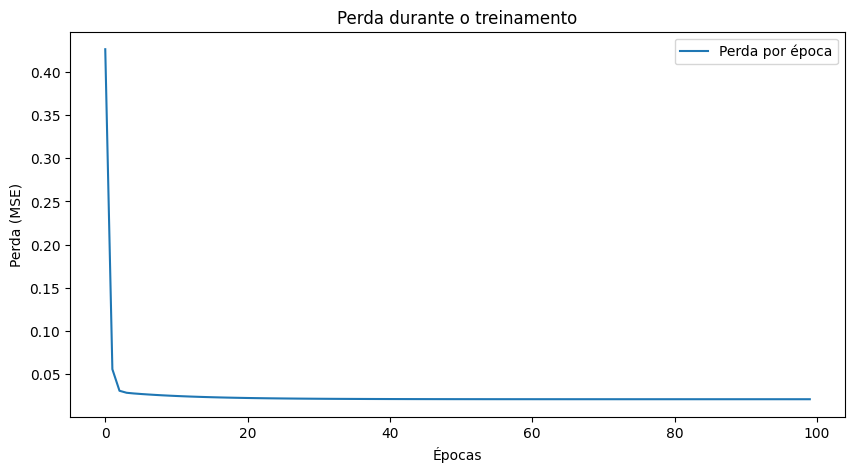

In [ ]:
# Plot da perda por época
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Perda por época')
plt.xlabel('Épocas')
plt.ylabel('Perda (MSE)')
plt.title('Perda durante o treinamento')
plt.legend()
plt.show()

### Predict

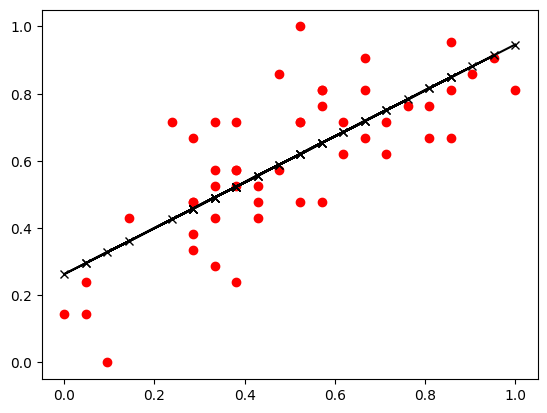

In [ ]:
y_pred = model.forward(x_train_bias)
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, y_pred, 'kx-', label='Fitting Line')

### Parâmetros treinados

In [ ]:
print(model.w)

[[0.26301638 0.683235  ]]


### Avaliação do modelo

In [ ]:
loss = np.square(y_pred - y_train).mean()
loss

0.021170049881943372

### Valor ótimo, solução analítica

$$  \mathbf{w} =(\mathbf{x^T} \mathbf{x})^{−1}\mathbf{x^T} \mathbf{y} $$

In [ ]:
x = x_train_bias
y = y_train
w_opt = (np.linalg.inv((x.T).dot(x)).dot(x.T)).dot(y)
print(w_opt.T)

[[0.26134159 0.68646976]]


# Exercícios

## Questões

1. Quantos parâmetros são treinados nesse modelo?
2 -> w0 e w1
2. Qual é o número de atributos de entrada para a rede?
2 (bias e x)
3. Qual é o número de saídas da rede?
1
4. Suponha que eu tenha agora 5 mil amostras para fazer a predição. Qual é o shape da matriz de entrada?
[5000,2]
   Qual é o shape do matriz de saída?
[5000,1]

## Atividades

1. Modifique o laço do treinamento via gradiente descendente para guardar em uma lista, o valor da perda no final
   de cada época. Após o treinamento, plote o valor da perda em função da época.
2. Calcule o valor da perda (MSE) da rede com os parâmetros inicializados, sem serem treinados.
3. Coloque os valores dos pesos da solução ótima analítica no modelo da rede e calcule o valor da perda (MSE) e
   compare com o valor da perda obtida pelo método da otimização via gradiente descendente.

In [ ]:
# 2

model2 = Net(2,1)
print(model2.w)
y_pred = model2.forward(x_train_bias)
loss = np.square(y_pred - y_train).mean()
print(loss)

[[-0.08492375 -0.0262352 ]]
0.5382612343347966


In [ ]:
# 3

model3 = Net(2,1)
x = x_train_bias
y = y_train
w_opt = (np.linalg.inv((x.T).dot(x)).dot(x.T)).dot(y)
model3.w[0][0] = w_opt[0]
model3.w[0][1] = w_opt[1]
y_pred_otimo = model3.forward(x_train_bias)
loss_otima = np.square(y_pred_otimo - y_train).mean()
print("Perda otimo")
print(loss_otima)

y_pred_treinamento = model.forward(x_train_bias)
loss_treinamento = np.square(y_pred_treinamento - y_train).mean()
print("Perda Treinamento")
print(loss_treinamento)

print(f"\nComparação das perdas:")
print(f"Perda inicial (MSE) com pesos não treinados: {loss}")
print(f"Perda final com pesos treinados (gradiente descendente): {loss_treinamento}")
print(f"Perda com pesos ótimos analíticos: {loss_otima}")

Perda otimo
0.021169424119097165
Perda Treinamento
0.021170049881943372

Comparação das perdas:
Perda inicial (MSE) com pesos não treinados: 0.5382612343347966
Perda final com pesos treinados (gradiente descendente): 0.021170049881943372
Perda com pesos ótimos analíticos: 0.021169424119097165


<ipython-input-20-8382c4b9605a>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  model3.w[0][0] = w_opt[0]
<ipython-input-20-8382c4b9605a>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  model3.w[0][1] = w_opt[1]


# Aprendizados

- Calcular antes e depois do treinamento.
- Calcular com pesos ótimos analíticos
- Loop de treinamento com gradiente descendente

